In [55]:
import os
import scipy.io as io 
import control as ctrl 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.fftpack import fft

In [56]:
#read frequency respose data from .mat file 
data = io.loadmat('platform_resp.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'MagR', 'Freq'])


In [57]:
MagR = data["MagR"]
Freq = data["Freq"]
Phase = np.angle(MagR.T)
Mag = 20*np.log10(np.abs(MagR.T))
Freq = Freq.T
#Freq = Freq.T/(2*np.pi)

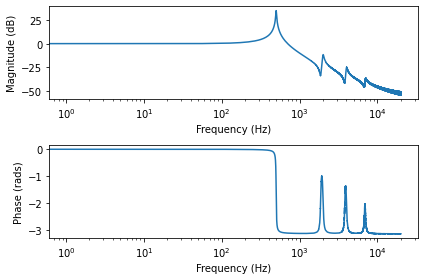

In [58]:
fig , (ax1, ax2) = plt.subplots(2,1)
ax1.semilogx(Freq,Mag)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude (dB)')

ax2.semilogx(Freq,Phase)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel('Phase (rads)')
plt.tight_layout()
#plt.show()

In [59]:
#The plot above shows that dominant resonant harmonics at varying frequencies in the magnitude response, the dominant resonant mode looks to be at 500 Hz

#Future Implementation to look at Machine Learning techniques to model frequecy domain data in state space or trasnfer function method

In [60]:
FreqResponseData = np.squeeze(MagR)
FreqData = np.squeeze(Freq.T)
sys = ctrl.frd(FreqResponseData,FreqData)

In [61]:
sys

FrequencyResponseData(array([[[ 1.01070559+0.00000000e+00j,  1.01057837-3.54225674e-05j,
          1.01076667-7.08468248e-05j, ..., -0.00241208-2.26927403e-06j,
         -0.00259933-2.26890214e-06j, -0.00249564-2.26853034e-06j]]]), array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.9998e+04, 1.9999e+04,
       2.0000e+04]))